[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/UT-GEOML/GEO398D/blob/main/03-Decision_trees.ipynb)

# Decision Trees and Random Forests

Decision trees are intuitive ways to classify or label objects: you simply ask a series of questions designed to zero in on the classification. Decision Trees are powerful algorithms, capable of fitting (and overfitting!) complex datasets. Decision Trees are also the fundamental components of Random Forests, which are among the most powerful algorithms available today.

The first part of this notebook is based on the book ["Hands-on Machine Learning with Scikit-Learn, Keras, and Tensorflow"](https://github.com/ageron/handson-ml3), by Aurélien Géron.

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
df['species'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
from sklearn.tree import DecisionTreeClassifier

X = iris.data[:, 2:] # restrict dataset to petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

Decision trees require very little data preparation. They don't require feature scaling or centering at all.

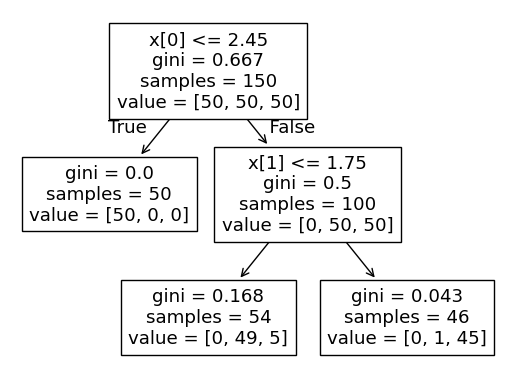

In [8]:
from sklearn import tree
tree.plot_tree(tree_clf);

If you are running this notebook in your own Python environment, you can install `graphviz` with:

`conda install -c conda-forge python-graphviz`

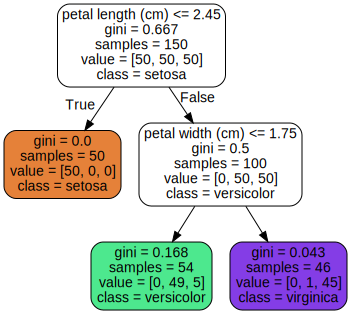

In [9]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

Source.from_file("iris_tree.dot")

A node's `samples` attribute counts how many training instances it applies to.

A nodes' `value` tells you how many training instances of each class this node applies to: for example, the bottom right node applies to 0 Iris setosa, 1 Iris versicolor, and 45 Iris virginica.

A nodes's `gini` attribute meaures its impurity: a node is "pure" if all training instances in it belong to the same class. It is computed as follows:

$G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2 $,

where $p_{i,k}$ is the ratio of class $k$ instances among the training instances in the $i^{th}$ node.

For example, the depth-2 left node has a `gini` score equal to $1 - (0/54)^2 - (49/54)^2 - (5/54)^2 = 0.168$.

Scikit-Learn uses the **Classification and Regression Tree (CART)** algorithm to train Decision Trees. It works by first splitting the training set into two subsets using a single feature $k$ and a threshold $t_k$. To choose $k$ and $t_k$, it searches for the pair $(k, t_k)$ that produces the purest subsets (weighted by their size). The cost function that needs to be minimized looks like this:

$ J(k, t_k)  = \frac{m_{left}}{m} G_{left} + \frac{m_{right}}{m} G_{right}$

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets, and so on, recursively. It stops once it reaches the maximum depth or if it cannot find a split that will reduce impurity.

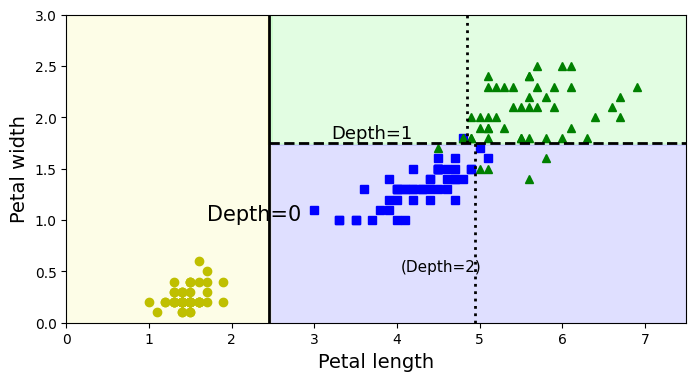

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

fig = plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.70, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13);
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11);

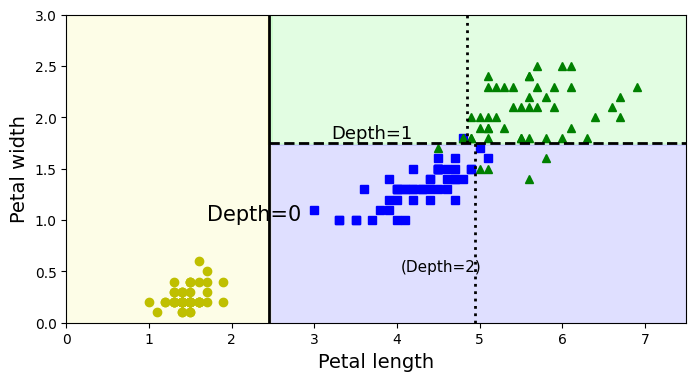

In [11]:
fig

Decision Trees are intuitive, and their decisions are easy to interpret (**white box models**). In contrast, Random Forests or neural networks are generally considered **black box models**; it is usually hard to explain why the predictions were made. Decision Trees provide simple classification rules that can even be applied manually if need be.

Decision Trees make very few assumptions about the training data; if left unconstrained, the tree structure will adapt itself to the training data, fitting it very closely; most likely overfitting it. To avoid overfitting, we need to restrict the tree's freedom during training (regularization). The most obvious way to do this with Decision Trees is to restrict the maximum depth of the tree (the `max_depth` hyperparameter). Other parameters that restrict the shape of the tree: `min_samples_split`, `min_samples_leaf`, `max_leaf_nodes`, `max_features`. Increasing `min_*` or reducing `max_*` parameters will regularize the model.

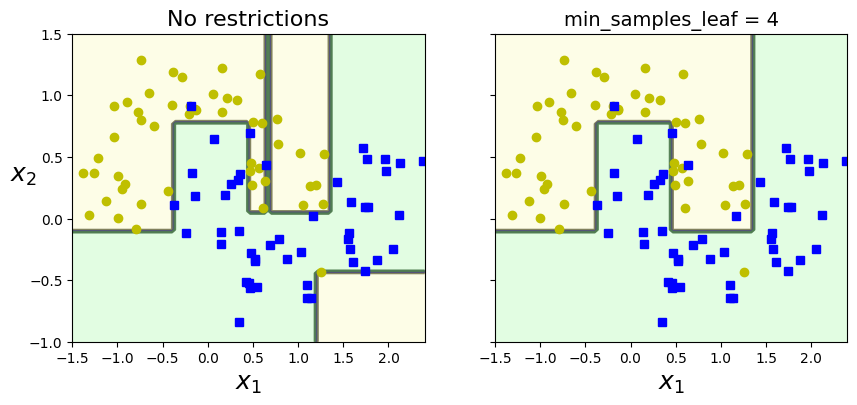

In [12]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53) # create synthetic data

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)
plt.ylabel("");

## Predicting classes and class probabilities

A Decision tree can estimate the probability that an instance belongs to a particular class $k$. First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances in this node. For example, if you found a flower whose petals are 5 cm long and 1.5 cm wide, the corresponding leaf node is the depth-2 left node, so the Decision Tree should output the following probabilities: 0% for Iris setosa (0/54), 90.7% for Iris versicolor (49/54), and 9.3% for Iris virginica (5/54).

In [13]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [14]:
tree_clf.predict([[5, 1.5]])

array([1])

## Sensitivity to training set details

Decision Treea are simple to understand and interpret, easy to use, versatile, and powerful; but they do have a few limitations. First, Decision Trees rely on orthogonal decision boundaries, and this makes them sensitive to training set rotation.

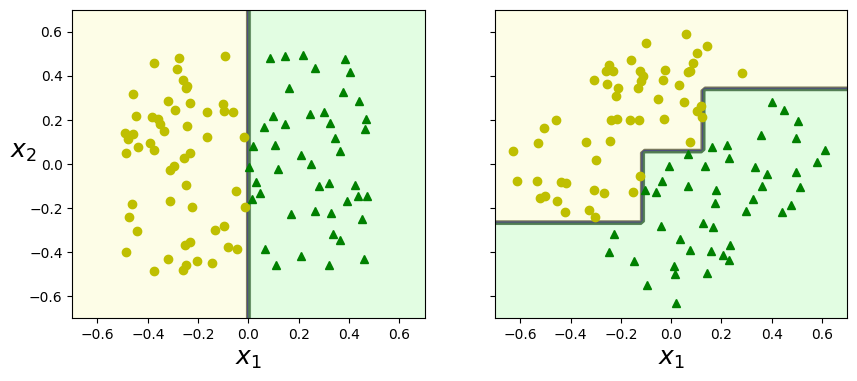

In [15]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("");

More generally, the main issue with Decision Trees is that they are very sensitive to small variations in the training data. For example, if you just remove the widest Iris versicolor from the iris dataset and train a new Decision Tree, you may get the tree below. In fact, since the training algorithm used by Scikit-Learn is stochastic, you may get very different models even on the same training data.

In [16]:
X[(X[:, 1]==X[:, 1][y==1].max()) & (y==1)] # wide st Iris versicolor flower

array([[4.8, 1.8]])

In [17]:
not_widest_versicolor = (X[:, 1]!=1.8) | (y==2)
X_tweaked = X[not_widest_versicolor]
y_tweaked = y[not_widest_versicolor]

tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

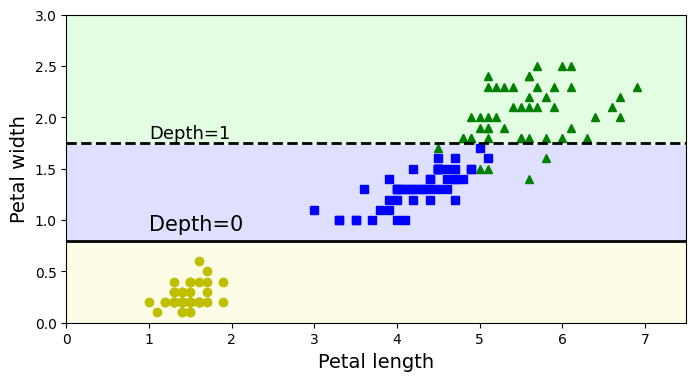

In [18]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13);

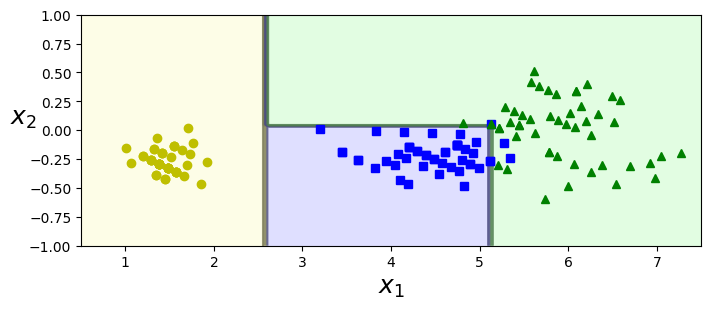

In [19]:
angle = np.pi / 9
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False);

# Regression trees

Decision Trees are also capable of performing regression tasks. Let's build a regression tree using Scikit-Learn's `DecisionTreeRegressor` class.

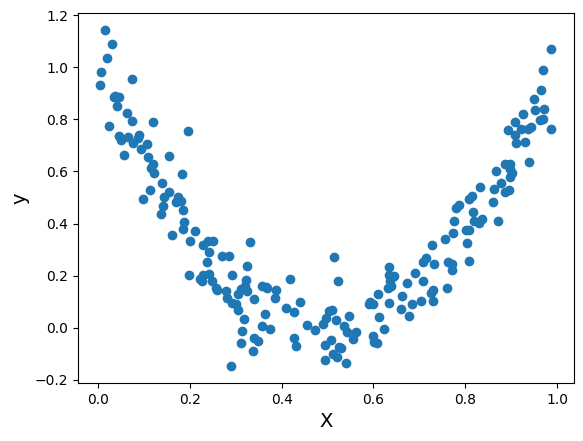

In [20]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10
plt.figure()
plt.scatter(X, y)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14);

In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

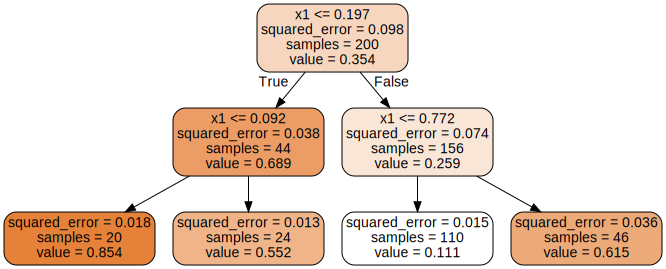

In [22]:
export_graphviz(
        tree_reg,
        out_file="reg_tree.dot",
        feature_names=["x1"],
        rounded=True,
        filled=True
    )

Source.from_file("reg_tree.dot")

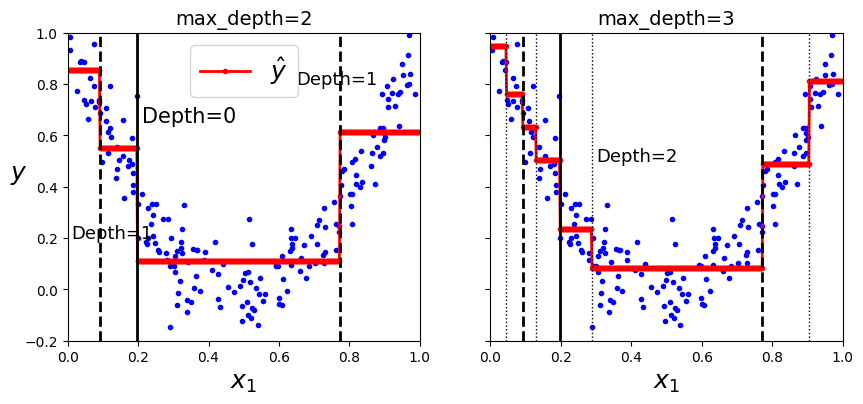

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14);

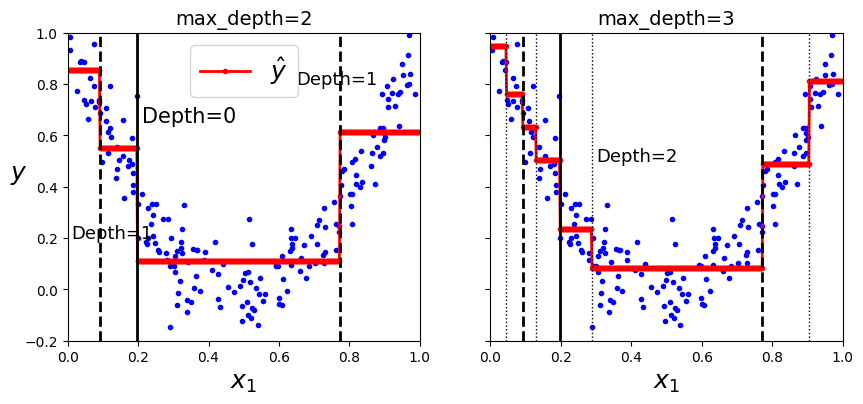

In [24]:
fig

The CART algorithm works mostly the same way as earlier, except that instead of trying to split the training set in a way that minimizes impurity, it now tries to split the training set in a way that minimizes the MSE (mean squared error).

Just like with classification tasks, Decision Trees are prone to overfitting.

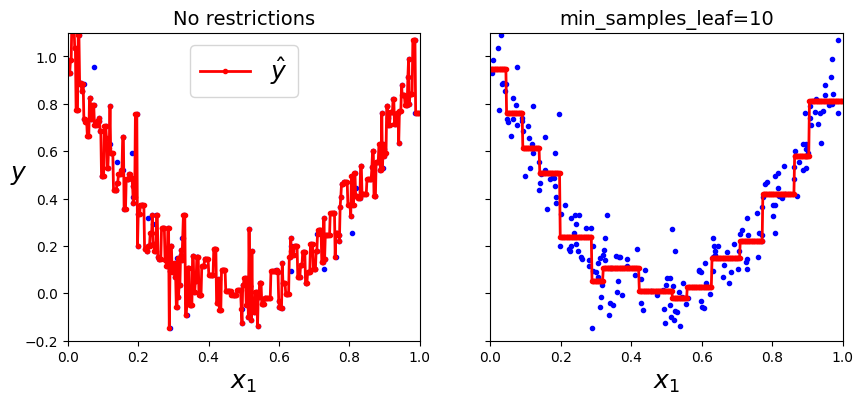

In [25]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14);

# Ensemble Learning | Random Forests

* ask many people a complex question and aggregate their answers - the **wisdom of the crowds**
* aggregate the predictions of a group of predictors (classifiers or regressors) --> better predictions than the best individual predictor
* a group of predictors is called an **ensemble**; the technique is called **ensemble learning**
* e.g., you can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you obtain the predictions of all the indivisual trees, then predict the class that gets the most votes --> **Random Forest**
* the winning solutions in ML competitions often involve ensemble methods

## Voting classifiers

* we have trained a few classifiers, each one achieving about 80% accuracy
* we can create an even better classifier by aggregating the predictions of each classifier and predicting the class that gets the most votes
* this is called a **hard voting classifier**

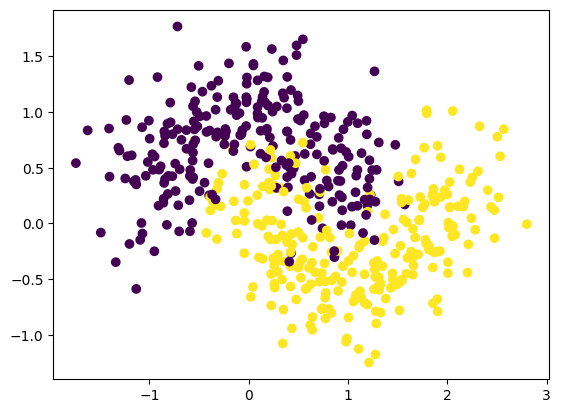

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y);

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # support vector classification
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [28]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [29]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


### Diversity is good!

Ensemble methods work best when the predictors are as independent from each other as possible. One way to get diverse classifiers is to train them using very different algorithms.

## Bagging

Another approach to get different classifiers is to to train the same algorithm (e.g., Decision Tree) on different subsets of the training data. When sampling is performed with replacement, this method is called **bagging** (= bootstrap aggregating). Sampling without replacement is called **pasting**.

In [30]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [32]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


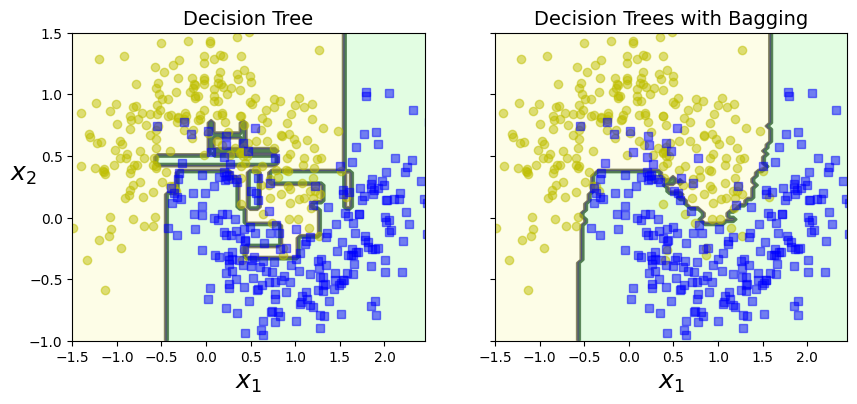

In [33]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("");

## Random Forests

A Random Forest is an ensemble of Decision Trees, generally trained via the bagging method, typically with `max_samples` set to the size of the training set. Instead of building a BaggingClassifier and passing it a DecisionTreeClassifier, you can instead use the **RandomForestClassifier** class.

In [34]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

Another great quality of Random Forests is that they make it easy to measure the relative importance of each feature. Scikit-Learn measures a feature's importance by looking at how much the tree nodes that use that feature reduce impurity on average. You can access this result using the `feature_importances_` variable.

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


# Classifying ice-wedge polygons by shape

[Ice-wedge](https://en.wikipedia.org/wiki/Ice_wedge) polygons are common features in lowland areas with permafrost; they form due to thermal contraction of the soil during the cold winter months. In most places they are roughly hexagonal in shape, but in some circumstances,e.g., when they form on point bars, they are rectangular. In this next section, we will work on building a random forest classifier to distinguish rectangular polygons from non-rectangular ones.

A large number of these polygons have been interpreted, using a deep learning approach that we will see later in class. For now, we will load the data and try to classify the polygons.

The polygons are stored as shapefiles (.shp extension) and we can use the [geopandas](https://geopandas.org/en/stable/about.html) package to read and manipulate them. Geopandas is a combination of [pandas](https://pandas.pydata.org/) and [shapely](https://shapely.readthedocs.io/en/stable/manual.html).

The typical ice-wedge polygons tend to be hexagonal (or have 5-7 vertices), with no preferred orientation.

<img src="https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/ice_wedge_polygons_1.png">

Ice-wedge polygons that formed on point bars of meandering rivers tend to be rectangular, with an orientation that seems to conform to the growth history of the point bar. The network in this image was extracted using a convolutional neural network called Unet.

<img src="https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/ice_wedge_polygons_2.png">

Let's download the data using 'wget' and then unzip the zip-file.

In [42]:
# use this with Google Colab:

!wget https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/ice_wedge_polygons.zip

--2025-02-11 14:39:31--  https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/ice_wedge_polygons.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10575302 (10M) [application/zip]
Saving to: ‘ice_wedge_polygons.zip’

ice_wedge_polygons. 100%[===================>]  10.08M  --.-KB/s    in 0.05s   

2025-02-11 14:39:31 (193 MB/s) - ‘ice_wedge_polygons.zip’ saved [10575302/10575302]



In [37]:
# use this with local notebook:

#import wget
#downloaded_file = wget.download('https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/ice_wedge_polygons.zip')

In [43]:
!unzip ice_wedge_polygons.zip

Archive:  ice_wedge_polygons.zip
  inflating: ice_wedge_polygons.shx  
  inflating: __MACOSX/._ice_wedge_polygons.shx  
  inflating: ice_wedge_polygons.cpg  
  inflating: __MACOSX/._ice_wedge_polygons.cpg  
  inflating: ice_wedge_polygons.dbf  
  inflating: __MACOSX/._ice_wedge_polygons.dbf  
  inflating: ice_wedge_polygons.prj  
  inflating: __MACOSX/._ice_wedge_polygons.prj  
  inflating: ice_wedge_polygons.shp  
  inflating: __MACOSX/._ice_wedge_polygons.shp  


In [44]:
import geopandas
polys = geopandas.read_file('ice_wedge_polygons.shp')
polys.head()

,area,geometry
0,1219.915268,"POLYGON ((14675300.875 11295498.785, 14675299...."
1,1661.556428,"POLYGON ((14675372.875 11295527.535, 14675372...."
2,1716.414698,"POLYGON ((14675414.876 11295519.785, 14675413...."
3,1591.131509,"POLYGON ((14676047.713 11295494.952, 14676046...."
4,3499.337653,"POLYGON ((14675995.879 11295526.785, 14675996...."


Let's look at a subset of the data. We will use the polygons on the left (western) side of this map as examples of the 'normal' ice-wedge polygons and the polygons on the right (eastern) side of this map as examples of the rectangular ice-wedge polygons.

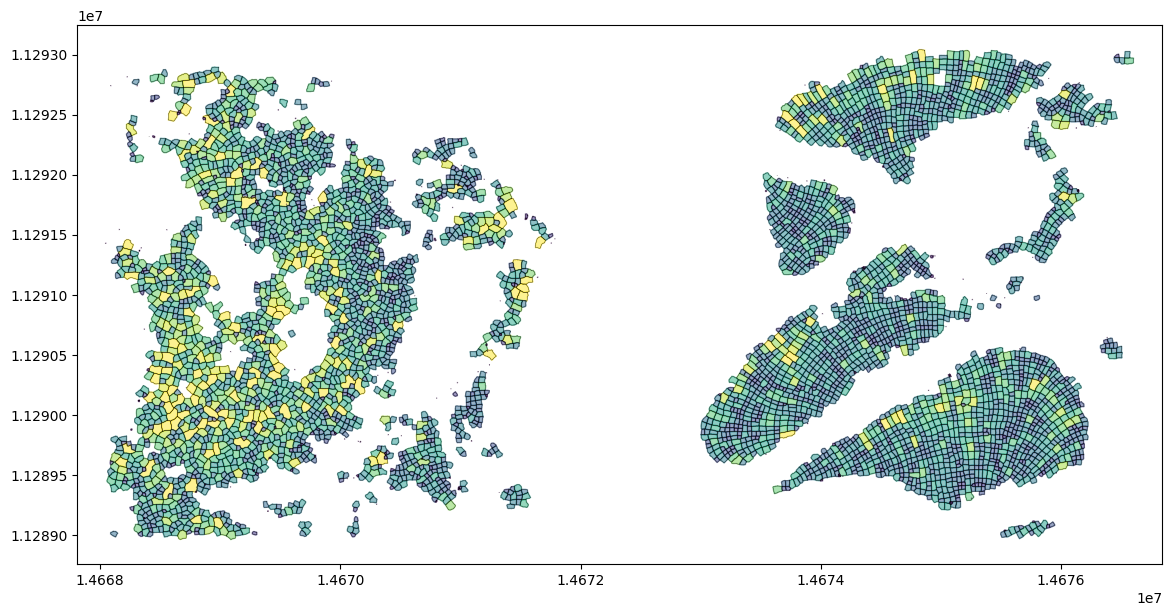

In [45]:
import matplotlib.colors as mcolors
colormap = plt.get_cmap('viridis')
norm = mcolors.Normalize(vmin=0, vmax=5000)

plt.figure(figsize = (14, 7))
for poly in polys['geometry']:
    if poly.centroid.y > 11289000 and poly.centroid.y < 11293000:
        # color polygons by area:
        plt.fill(poly.exterior.xy[0], poly.exterior.xy[1], linewidth=None, color=colormap(norm(poly.area)), alpha=0.5)
        plt.plot(poly.exterior.xy[0], poly.exterior.xy[1], linewidth=0.25, color='k')
plt.axis('equal');

Let's add a new column to the dataframe: one that defines the polygon type. This can be either 'normal', 'rectangular', or 'unknown'. Our goal is to build a model that then can be used to determine the polygon type for the 'unknown' category.

In [46]:
count = 0
for poly in polys['geometry']:
    if poly.centroid.x > 14672400 and poly.centroid.y > 11285500 and poly.centroid.y < 11293500:
        polys.loc[count, 'type'] = 'rectangular'
    elif poly.centroid.x < 14672400 and poly.centroid.y > 11285500 and poly.centroid.y < 11293500:
        polys.loc[count, 'type'] = 'normal'
    else:
        polys.loc[count, 'type'] = 'unknown'
    count += 1

polys.head()

,area,geometry,type
0,1219.915268,"POLYGON ((14675300.875 11295498.785, 14675299....",unknown
1,1661.556428,"POLYGON ((14675372.875 11295527.535, 14675372....",unknown
2,1716.414698,"POLYGON ((14675414.876 11295519.785, 14675413....",unknown
3,1591.131509,"POLYGON ((14676047.713 11295494.952, 14676046....",unknown
4,3499.337653,"POLYGON ((14675995.879 11295526.785, 14675996....",unknown


The 'target' column in this dataframe is the 'type' column. However, we only have one potential 'feature' that can be used in the classification: the 'area' column. We cannot use the 'geometry' column as a feature, as the classifier will not accept a shapely Polygon object as input.

So we need to add new feature columns to the dataframe: attributes of the polygons that we think will be useful when trying to distinguish 'normal' polygons from 'meander' polygons. This process is called 'feature engineering' and is an important part of conventional machine learning that relies on structured, tabular data. The advantage of deep neural networks is that they take care of feature engineering themselves, under the hood, and there is no need for us to deal with it. That said, neural networks still underperform more conventional ML methods when it comes to tabular data with useful features.

To engineer some new features, we need ideas for features that are potentially useful for distinguishing rectangular shape from the rest. Two obvious candidates are the **number of vertices** and the **aspect ratio**.

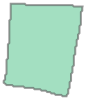

In [47]:
poly = polys.iloc[1000].geometry
poly

In [48]:
len(poly.exterior.coords.xy[0])-1 # many points in the polygon; their number has nothing to do with the number of vertices

216

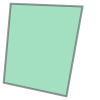

In [49]:
poly.simplify(3) # simplified polygon has only a small number of coordinates

In [50]:
len(poly.simplify(3).exterior.coords.xy[0])-1 # number of vertices equals the number of x-coordinates

4

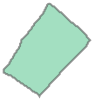

In [51]:
poly = polys.iloc[2100].geometry
poly

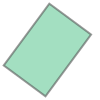

In [52]:
poly.minimum_rotated_rectangle # we can use this method to get the aspect ratio

In [53]:
# function for computing the aspect ratio

from shapely.geometry import Polygon

def calculate_aspect_ratio(rectangle):
    if not isinstance(rectangle, Polygon):
        raise ValueError("Input must be a Shapely Polygon")

    # Ensure the polygon is a rectangle (has 4 sides plus closing point)
    if len(rectangle.exterior.coords) != 5:
        raise ValueError("Polygon is not a rectangle")

    # Get the coordinates of the rectangle
    coords = list(rectangle.exterior.coords)

    # Calculate lengths of two adjacent sides
    width = np.linalg.norm(np.array(coords[0]) - np.array(coords[1]))
    height = np.linalg.norm(np.array(coords[1]) - np.array(coords[2]))

    # Calculate and return the aspect ratio
    if width < height:
        aspect_ratio = width / height
    else:
        aspect_ratio = height / width
    return aspect_ratio

In [54]:
import numpy as np
import warnings

# use the tricks described above to add features to the dataframe:

for i in range(len(polys)):
    poly = polys.loc[i, 'geometry'].simplify(3)
    polys.loc[i, 'n_vertices'] = len(poly.exterior.coords.xy[0])-1
    with warnings.catch_warnings():
        warnings.simplefilter("ignore") # we need this so that some annoying warnings are ignored
        polys.loc[i, 'aspect ratio'] = calculate_aspect_ratio(poly.minimum_rotated_rectangle)

polys.head()

,area,geometry,type,n_vertices,aspect ratio
0,1219.915268,"POLYGON ((14675300.875 11295498.785, 14675299....",unknown,6.0,0.901996
1,1661.556428,"POLYGON ((14675372.875 11295527.535, 14675372....",unknown,8.0,0.696075
2,1716.414698,"POLYGON ((14675414.876 11295519.785, 14675413....",unknown,5.0,0.942608
3,1591.131509,"POLYGON ((14676047.713 11295494.952, 14676046....",unknown,5.0,0.662969
4,3499.337653,"POLYGON ((14675995.879 11295526.785, 14675996....",unknown,6.0,0.754288


In [55]:
# create dataframe with training data

polys_training = polys[(polys['type'] == 'rectangular') | (polys['type'] == 'normal')]
polys_training = polys_training.dropna()
polys_training.head()

,area,geometry,type,n_vertices,aspect ratio
600,2387.580595,"POLYGON ((14675858.879 11293538.051, 14675859....",rectangular,7.0,0.666224
601,3553.917353,"POLYGON ((14675654.544 11293520.467, 14675654....",rectangular,8.0,0.689881
605,3694.620763,"POLYGON ((14675453.209 11293526.134, 14675453....",rectangular,9.0,0.780155
606,1649.581441,"POLYGON ((14675842.628 11293524.801, 14675842....",rectangular,6.0,0.622055
607,3112.015955,"POLYGON ((14675399.876 11293510.551, 14675399....",rectangular,7.0,0.985807


In [56]:
# build and train model; make predictions

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = polys_training.drop(['type', 'geometry'], axis=1)  # Features (independent variables)
y = polys_training['type']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6506069802731411


We can look at which are the more important features:

In [57]:
feature_list = ['area', 'n_vertices', 'aspect ratio']
for name, score in zip(feature_list, rf.feature_importances_):
    print("{:12s}".format(name), "{:10.3f}".format(score))

area              0.437
n_vertices        0.157
aspect ratio      0.406


We can use the model to predict the polygon type for all polygons:

In [58]:
polys_clean = polys.dropna().copy()
feature_list = ['area', 'n_vertices', 'aspect ratio']
polys_clean['predicted type'] = list(rf.predict(polys_clean[feature_list]))
polys_clean.head()

,area,geometry,type,n_vertices,aspect ratio,predicted type
0,1219.915268,"POLYGON ((14675300.875 11295498.785, 14675299....",unknown,6.0,0.901996,normal
1,1661.556428,"POLYGON ((14675372.875 11295527.535, 14675372....",unknown,8.0,0.696075,rectangular
2,1716.414698,"POLYGON ((14675414.876 11295519.785, 14675413....",unknown,5.0,0.942608,rectangular
3,1591.131509,"POLYGON ((14676047.713 11295494.952, 14676046....",unknown,5.0,0.662969,rectangular
4,3499.337653,"POLYGON ((14675995.879 11295526.785, 14675996....",unknown,6.0,0.754288,rectangular


Let's randomly pick some polygons from both categories and plot them to see how they look like:

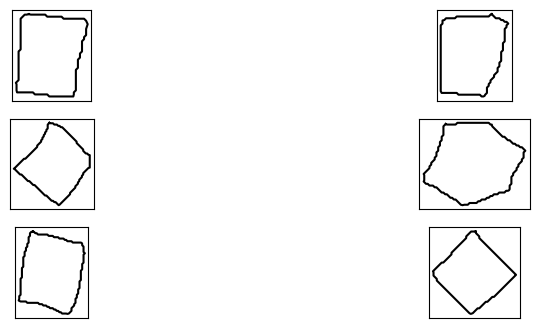

In [59]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ind = np.random.choice(polys_clean[polys_clean['predicted type']=='rectangular'].index)
    poly = polys_clean.loc[ind, 'geometry']
    ax.plot(poly.exterior.xy[0], poly.exterior.xy[1], color='k')
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

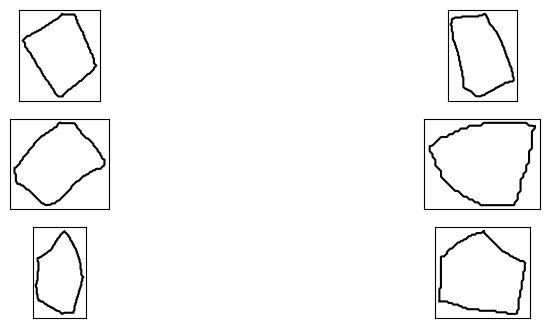

In [60]:
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ind = np.random.choice(polys_clean[polys_clean['predicted type']=='normal'].index)
    poly = polys_clean.loc[ind, 'geometry']
    ax.plot(poly.exterior.xy[0], poly.exterior.xy[1], color='k')
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

100%|██████████| 14280/14280 [01:42<00:00, 139.32it/s]


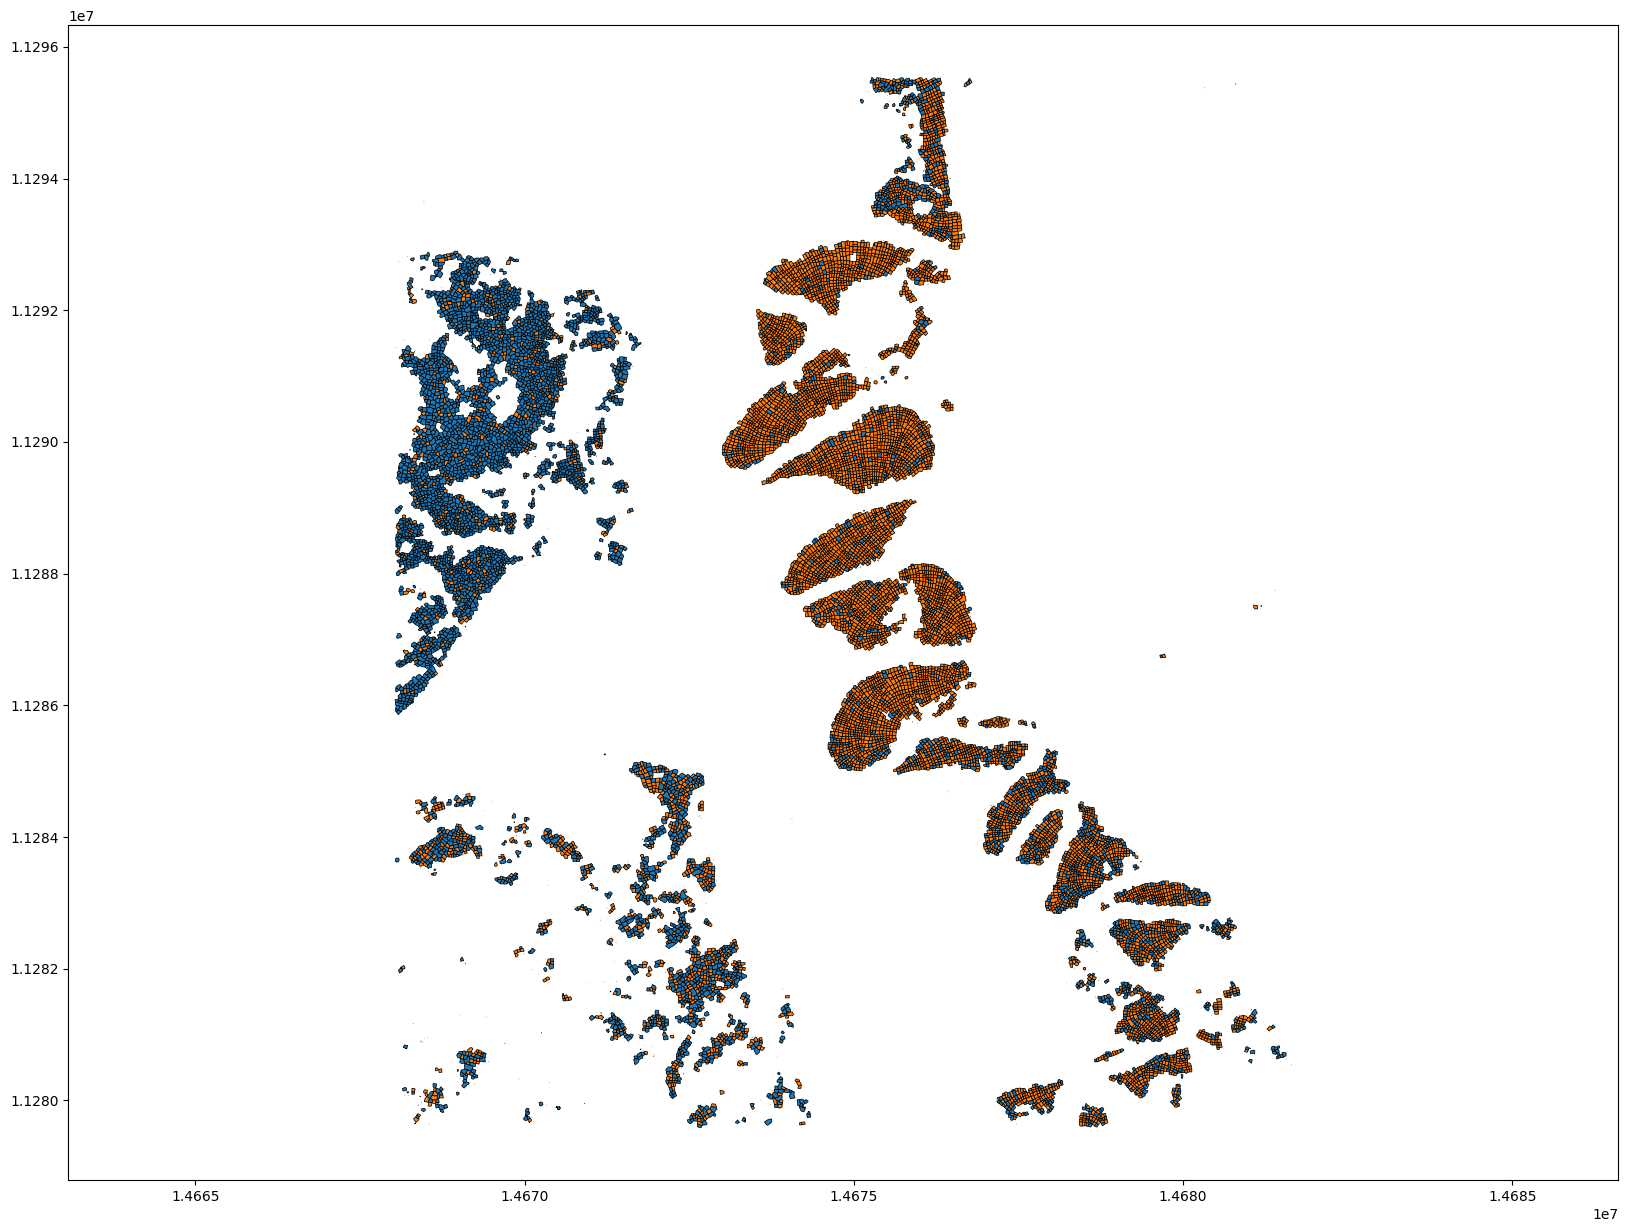

In [61]:
# plot the classification result for all the polygons
from tqdm import trange
plt.figure(figsize=(20, 15))
for i in trange(len(polys_clean)):
    x = polys_clean['geometry'].iloc[i].exterior.xy[0]
    y = polys_clean['geometry'].iloc[i].exterior.xy[1]
    if polys_clean['predicted type'].iloc[i] == 'normal':
        plt.fill(x, y, '#1f77b4', edgecolor='k', linewidth=0.5)
    else:
        plt.fill(x, y, '#ff7f0e', edgecolor='k', linewidth=0.5)
plt.axis('equal');

# Task 1

**(a)** For the ice-wedge polygon classification problem, we got an accuracy of ~65%. Your task is to improve the accuracy as much as possible. There are multiple ways of doing this:

1. We only had three features (area, number of vertices, and aspect ratio) doing the training and the prediction. It is likely that adding new features will improve the model. These new features need to be potentially useful when it comes to telling whether a polygon is rectangular or not. One obvious set of features is the distribution of angles in a polygon. (Note however that the average angle is essentially the same feature as the number of vertices.)

2. The training data is not perfect: the 'normal' polygons include a few bits and pieces that look quite rectangular. Creating a training set that only contains high-quality examples from both classes, even if it is smaller in size, might improve the model.

**(b)** Using all the features, build a decision tree classifier and restrict the depth to a small number (not larger than four). Train it and then use the 'graphviz' module to plot the tree.

**(c)** Compute the feature importances and make a bar graph showing which are the most important ones.

#### a)
* Feature Addition #1: Calculating the standard deviation of the interior angles of each polygon


In [62]:
import numpy as np

def calculate_angle_std(polygon):
    """Calculates the standard deviation of interior angles of a polygon."""
    coords = np.array(polygon.exterior.coords)
    # Close the polygon if it's not already closed
    if not np.array_equal(coords[0], coords[-1]):
        coords = np.vstack([coords, coords[0]])

    # Calculate the vectors representing the sides of the polygon
    vectors = coords[1:] - coords[:-1]

    # Calculate the angles between consecutive sides
    angles = []
    for i in range(len(vectors) - 1):
        v1 = vectors[i]
        v2 = vectors[i + 1]
        angle = np.arctan2(np.cross(v1, v2), np.dot(v1, v2))
        angles.append(np.degrees(angle))

    # Calculate and return the standard deviation of the angles
    return np.std(angles)

In [63]:
for i in range(len(polys)):
    poly = polys.loc[i, 'geometry'].simplify(3)
    #... (Existing code to calculate n_vertices and aspect ratio)
    polys.loc[i, 'angle_std'] = calculate_angle_std(poly)

In [65]:
polys_training = polys[(polys['type'] == 'rectangular') | (polys['type'] == 'normal')]
polys_training = polys_training.dropna()
polys_training.head()

,area,geometry,type,n_vertices,aspect ratio,angle_std
600,2387.580595,"POLYGON ((14675858.879 11293538.051, 14675859....",rectangular,7.0,0.666224,38.875742
601,3553.917353,"POLYGON ((14675654.544 11293520.467, 14675654....",rectangular,8.0,0.689881,30.828269
605,3694.620763,"POLYGON ((14675453.209 11293526.134, 14675453....",rectangular,9.0,0.780155,26.318304
606,1649.581441,"POLYGON ((14675842.628 11293524.801, 14675842....",rectangular,6.0,0.622055,29.468017
607,3112.015955,"POLYGON ((14675399.876 11293510.551, 14675399....",rectangular,7.0,0.985807,23.661095


In [66]:
#repeat the training and testing process with the new feature included
X = polys_training.drop(['type', 'geometry'], axis=1)  # Features (independent variables)
y = polys_training['type']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6745068285280729


Ok, adding in the standard deviation of the angles only slightly improved our results

* Feature Addition #2: Calculating the orientation of each polygon's longest axis

In [69]:
# Calculate the angle of the minimum bounding rectangle
from shapely.affinity import rotate
import numpy as np
#Apply minimum_rotated_rectangle to each polygon in the 'geometry' column
min_rects = polys['geometry'].apply(lambda polygon: polygon.minimum_rotated_rectangle)

#Get the angle of the longest side for each rectangle
angles = min_rects.apply(lambda rect:
    90 if rect.exterior.coords[1][0] - rect.exterior.coords[0][0] == 0 else
    np.degrees(np.arctan((rect.exterior.coords[1][1] - rect.exterior.coords[0][1]) / (rect.exterior.coords[1][0] - rect.exterior.coords[0][0])))
)

polys['orientation'] = angles



In [70]:
#recreate the polys_training dataframe
polys_training = polys[(polys['type'] == 'rectangular') | (polys['type'] == 'normal')]
polys_training = polys_training.dropna()
polys_training.head()

,area,geometry,type,n_vertices,aspect ratio,angle_std,orientation
600,2387.580595,"POLYGON ((14675858.879 11293538.051, 14675859....",rectangular,7.0,0.666224,38.875742,-75.963565
601,3553.917353,"POLYGON ((14675654.544 11293520.467, 14675654....",rectangular,8.0,0.689881,30.828269,41.309280
605,3694.620763,"POLYGON ((14675453.209 11293526.134, 14675453....",rectangular,9.0,0.780155,26.318304,-25.866038
606,1649.581441,"POLYGON ((14675842.628 11293524.801, 14675842....",rectangular,6.0,0.622055,29.468017,0.000000
607,3112.015955,"POLYGON ((14675399.876 11293510.551, 14675399....",rectangular,7.0,0.985807,23.661095,90.000000


In [71]:
#repeat the training and testing process with the new feature included
X = polys_training.drop(['type', 'geometry'], axis=1)  # Features (independent variables)
y = polys_training['type']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.697268588770865


Adding this feature seemed to slightly increase the accuracy further, let's add a few more features

In [72]:
#roundness
import math
polys['shape_index'] = polys['geometry'].length / (2 * np.sqrt(math.pi * polys['geometry'].area))

In [73]:
#recreate the polys_training dataframe
polys_training = polys[(polys['type'] == 'rectangular') | (polys['type'] == 'normal')]
polys_training = polys_training.dropna()
polys_training.head()

,area,geometry,type,n_vertices,aspect ratio,angle_std,orientation,shape_index
600,2387.580595,"POLYGON ((14675858.879 11293538.051, 14675859....",rectangular,7.0,0.666224,38.875742,-75.963565,1.245861
601,3553.917353,"POLYGON ((14675654.544 11293520.467, 14675654....",rectangular,8.0,0.689881,30.828269,41.309280,1.201511
605,3694.620763,"POLYGON ((14675453.209 11293526.134, 14675453....",rectangular,9.0,0.780155,26.318304,-25.866038,1.194071
606,1649.581441,"POLYGON ((14675842.628 11293524.801, 14675842....",rectangular,6.0,0.622055,29.468017,0.000000,1.198275
607,3112.015955,"POLYGON ((14675399.876 11293510.551, 14675399....",rectangular,7.0,0.985807,23.661095,90.000000,1.144507


In [74]:
#repeat the training and testing process with the new feature included
X = polys_training.drop(['type', 'geometry'], axis=1)  # Features (independent variables)
y = polys_training['type']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.706752655538695


In [75]:
#perimeter to axis ratio
polys['perimeter_area_ratio'] = polys['geometry'].length / polys['geometry'].area

In [76]:
#recreate the polys_training dataframe
polys_training = polys[(polys['type'] == 'rectangular') | (polys['type'] == 'normal')]
polys_training = polys_training.dropna()
polys_training.head()

,area,geometry,type,n_vertices,aspect ratio,angle_std,orientation,shape_index,perimeter_area_ratio
600,2387.580595,"POLYGON ((14675858.879 11293538.051, 14675859....",rectangular,7.0,0.666224,38.875742,-75.963565,1.245861,0.090385
601,3553.917353,"POLYGON ((14675654.544 11293520.467, 14675654....",rectangular,8.0,0.689881,30.828269,41.309280,1.201511,0.071446
605,3694.620763,"POLYGON ((14675453.209 11293526.134, 14675453....",rectangular,9.0,0.780155,26.318304,-25.866038,1.194071,0.069639
606,1649.581441,"POLYGON ((14675842.628 11293524.801, 14675842....",rectangular,6.0,0.622055,29.468017,0.000000,1.198275,0.104586
607,3112.015955,"POLYGON ((14675399.876 11293510.551, 14675399....",rectangular,7.0,0.985807,23.661095,90.000000,1.144507,0.072728


In [77]:
#repeat the training and testing process with the new feature included
X = polys_training.drop(['type', 'geometry'], axis=1)  # Features (independent variables)
y = polys_training['type']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7022003034901366


Adding in the Perimeter to Area ratio actually seemed to decrease the accuracy of the model,so we will remove it as a feature

In [78]:
polys = polys.drop('perimeter_area_ratio', axis=1)

* Now trying to see the results when we add an elongation feature

In [85]:
from shapely.geometry import Polygon

# Apply minimum_rotated_rectangle to each polygon
min_rects = polys['geometry'].apply(lambda polygon: polygon.minimum_rotated_rectangle)
# Calculate elongation for each polygon and store in the GeoDataFrame
polys['elongation'] = min_rects.apply(lambda rect:
    max(rect.bounds[2] - rect.bounds[0], rect.bounds[3] - rect.bounds[1]) /
    min(rect.bounds[2] - rect.bounds[0], rect.bounds[3] - rect.bounds[1])
)

In [86]:
#recreate the polys_training dataframe
polys_training = polys[(polys['type'] == 'rectangular') | (polys['type'] == 'normal')]
polys_training = polys_training.dropna()
polys_training.head(3)

,area,geometry,type,n_vertices,aspect ratio,angle_std,orientation,shape_index,elongation
600,2387.580595,"POLYGON ((14675858.879 11293538.051, 14675859....",rectangular,7.0,0.666224,38.875742,-75.963565,1.245861,1.282647
601,3553.917353,"POLYGON ((14675654.544 11293520.467, 14675654....",rectangular,8.0,0.689881,30.828269,41.309280,1.201511,1.023862
605,3694.620763,"POLYGON ((14675453.209 11293526.134, 14675453....",rectangular,9.0,0.780155,26.318304,-25.866038,1.194071,1.085036


In [87]:
#repeat the training and testing process with the new feature included
X = polys_training.drop(['type', 'geometry'], axis=1)  # Features (independent variables)
y = polys_training['type']  # Target variable (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=1000, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7033383915022762


While a very small change, adding the elongation feature did seem to increase the accuracy. The addition of each new feature seems to increase the accuracy, so we will stop trying to add more features

#### b)

In [89]:
from sklearn.tree import DecisionTreeClassifier

X = polys_training.drop(['type', 'geometry'], axis=1)  # Features (independent variables)
y = polys_training['type']

feature_names = X.columns.tolist()
shape_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
shape_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

# Task 2

For this task, we are going to focus on a classification problem that is more straightforward in terms of defining the features.

We have an image that was collected from an ultramafic rock that contains a lot of the mineral olivine, in addition to smaller amounts of other minerals (image courtesy of Dr. Estibalitz Ukar, UT Austin). The goal is to determine the composition of this rock, that is, what area fraction in the image is occupied by each mineral. Different minerals have different colors in the image; however, if you zoom in, you can see that at the pixel level the image is quite noisy, and there is no single color or pixel value that corresponds to a mineral, so we need to figure out a way to classify every pixel into a number of classes that correspond to the minerals. Your task is to create training data, build and train a random forest classifier, and derive the fraction of each mineral in the image.

This pixel-based segmentation workflow can be applied to any image-like dataset where you have multiple channels, e.g., detecting different classes in remote sensing data.

What follows is some background information on the minerals and their colors, and code for creating training data.

In [ ]:
import rasterio
from rasterio.features import rasterize
from PIL import Image
from matplotlib.widgets import PolygonSelector
from matplotlib.path import Path
from shapely.geometry import Polygon
from matplotlib.patches import PathPatch
import geopandas as gpd

In [ ]:
# download image
!wget https://raw.githubusercontent.com/zsylvester/GEO391_materials/master/ultramafic_rock.png

In [ ]:
image = plt.imread('ultramafic_rock.png')
plt.figure(figsize=(10,10))
plt.imshow(image);

1 . Use the [Polygonzone](https://polygonzone.roboflow.com/) online tool to digitize polygons for each class.

These are the minerals and their colors in the image:

1. Teal: olivine
2. Blue: clinopyroxene
3. Dark blue (slight difference with Cpx): orthopyroxene
4. Lime green: chromium spinel
5. Yellow (very little): nickel sulfide
6. Pink (very little): magnetite
7. Light blue (very little): apatite
8. Black: holes

It is a bit tricky to get good polygons for small crystals, so feel free to ignore the classes where it says "very little".

2. Once you have collected a few polygons for a class, copy and paste their coordinates into a list; then convert the arrays to shapely polygons:

In [ ]:
poly_list = [...]

polygons = []
for poly in poly_list:
    polygons.append(Polygon(poly))

3. Rasterize the polygons so that the pixels in each polygon are different from the rest of the image. I am providing the function to do this below.

In [ ]:
def rasterize_polygons(polygons, image, class_label):
    """
    Rasterizes a list of polygons onto an image-like array.

    Args:
        polygons (list): A list of polygons.
        image (numpy.ndarray): The input image.
        class_label: The class label you want to use (integer).

    Returns:
        numpy.ndarray: The rasterized array.

    """
    labels = class_label*np.ones((len(polygons),))
    # Combine polygons and labels into a tuple of (polygon, label) pairs
    shapes_with_labels = zip(polygons, labels)
    # Define the shape and resolution of the rasterized output
    out_shape = image.shape[:2]  # Output array shape (height, width)
    bounds = (0, image.shape[0], image.shape[1], 0)  # Left, bottom, right, top of the array (bounding box)
    # Define the transformation from pixel coordinates to spatial coordinates
    transform = rasterio.transform.from_bounds(*bounds, out_shape[1], out_shape[0])
    # Rasterize the polygons into an array of labels
    rasterized = rasterize(
        ((poly, label) for poly, label in shapes_with_labels),
        out_shape=out_shape,
        transform=transform,
        fill=0,  # Background value (for pixels outside polygons)
        dtype='int32'
    )
    return rasterized

In [ ]:
class_label = 2
rasterized = rasterize_polygons(polygons, np.array(image), class_label)

In [ ]:
plt.figure()
plt.imshow(rasterized);

4. Create a mask called 'labels' and assign the class label to the pixels that belong to the current class:

In [ ]:
# only run this once to initialize the 'labels' array!

labels = np.zeros((image.shape[0], image.shape[1]))

In [ ]:
labels[rasterized == class_label] = class_label # add new polygons to 'labels'

In [ ]:
plt.figure()
plt.imshow(labels);

5. Go through the polygon picking and rasterization for each class. At the end of the process, you should have a 'labels' array that has a background with values of 0, and values of 1 for class 1, values of 2 for class 2, and so on. Now your goal is to take all the R, G, B values for the nonzero pixels in 'labels' and sort them into a dataframe with columns 'R', 'G', 'B', and 'label'.

6. Once you have the dataframe, you can proceed to training a random forest classifier, with the features being R, G, and B, and the target being the 'label' column. Obviously, you should be aiming for a high accuracy; if there is significant confusion between some of the classes, you might want to rethink and repick the polygons.

7. Make the predictions for the whole image and plot the image so that every class is plotted with the mean R, G, B values from the training data (so that the prediction looks very similar to the original image).

8. Finally, compute the fraction of area occupied by each class in the image and report it for each mineral.